FINM 36702 Portfolio Credit Risk Homework 4

Hannah Wang

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')

# Question 1

## What is the value of The expected loss of the loan (EL)? 

In [27]:
EL = 0.4*0.02*0.1 + 0.3*0.04*0.3 + 0.2*0.06*0.5 + 0.1*0.08*0.7
print("The expected loss of the loan(EL) is %.2g." % EL)

The expected loss of the loan(EL) is 0.016.


## What is the value of The expected LGD of the loan (ELGD)?

In [28]:
PD = 0.4*0.02 + 0.3*0.04 + 0.2*0.06 + 0.1*0.08
ELGD = EL/PD
print("The expected LGD of the loan(ELGD) is %.2g." % ELGD)

The expected LGD of the loan(ELGD) is 0.4.


## What is The “time-weighted LGD” of the loan?

In [29]:
TWLGD = 0.4*0.1 + 0.3*0.3 + 0.2*0.5 + 0.1*0.7
print("The time-weighted LGD is %.2g." %TWLGD)

The time-weighted LGD is 0.3.


# Question 2

## Suppose that a loan is characterized by PD = 5%, ELGD = 30%, and pho = 15%. Suppose that instead of the LGD function preferred by Frye and Jacobs, this loan follows the “Variant A” alternative LGD function that the authors use for hypothesis testing. Plot the function within the unit square for four values of the “a” parameter: {-1, 0, 1, 2}.  

In [30]:
PD = 0.05
ELGD = 0.3
rho = 0.15
EL = ELGD*PD
cPD = np.linspace(0, 0.3, num=500)

In [31]:
def cLGD_func(a, cPD):
    cLGD = np.power(ELGD, a) * norm.cdf(norm.ppf(cPD)-(norm.ppf(PD)-norm.ppf(EL/np.power(ELGD, a)))/np.sqrt(1-rho))/cPD
    return cLGD

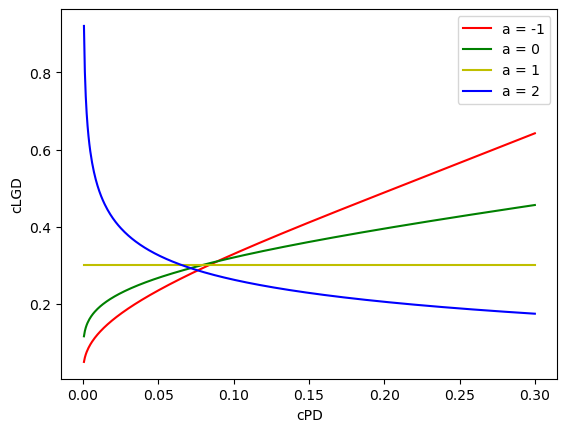

In [32]:
plt.plot(cPD, cLGD_func(-1, cPD),'r',label='a = -1')
plt.plot(cPD, cLGD_func(0, cPD),'g',label='a = 0')
plt.plot(cPD, cLGD_func(1, cPD),'y',label='a = 1')
plt.plot(cPD, cLGD_func(2, cPD),'b',label='a = 2')
plt.legend()
plt.xlabel('cPD')
plt.ylabel('cLGD')
plt.show()


# Question 3

## Suppose that cPD ~ Vasicek [ PD = 0.02, rho = 0.10]. Assuming that cPD and cLoss are comonotonic, plot three LGD functions for three possible distributions of cLoss:  (a)  cLoss ~ Vasicek [EL = 0.01, rho = 0.05] (b) cLoss ~ Vasicek [EL = 0.01, rho = 0.1] (c)  cLoss ~ Vasicek [EL = 0.01, rho = 0.15] 

In [33]:
cPD = np.linspace(0, 0.5, num=1000)

In [34]:
def cLGD_func_q3(cPD, EL, rho):
    FcPD = norm.cdf((np.sqrt(1-0.1)*norm.ppf(cPD)-norm.ppf(0.02))/np.sqrt(0.1))
    F_inv_cLoss = norm.cdf((norm.ppf(EL)+np.sqrt(rho)*norm.ppf(FcPD))/np.sqrt(1-rho))
    cLGD = F_inv_cLoss/cPD
    return cLGD

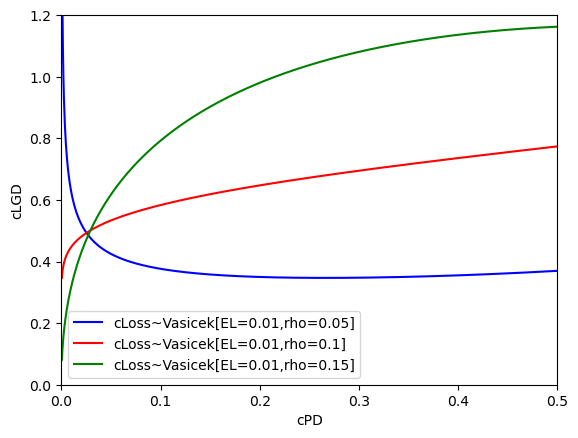

In [35]:
plt.plot(cPD, cLGD_func_q3(cPD, EL=0.01, rho=0.05),'b',label="cLoss~Vasicek[EL=0.01,rho=0.05]")
plt.plot(cPD, cLGD_func_q3(cPD, EL=0.01, rho=0.1),'r',label="cLoss~Vasicek[EL=0.01,rho=0.1]")
plt.plot(cPD, cLGD_func_q3(cPD, EL=0.01, rho=0.15),'g',label="cLoss~Vasicek[EL=0.01,rho=0.15]")
plt.legend()
plt.xlim(0,0.5)
plt.ylim(0,1.2)
plt.xlabel('cPD')
plt.ylabel('cLGD')
plt.show()

## Comment on the usefulness of each possible LGD function.  

From the above three LGD function, LGD is decreasing with cLoss~Vasicek(EL=0.01, rho=0.05), and is increasing with cLoss~Vasicek(EL=0.01, rho=0.1) and cLoss~Vasicek(EL=0.01, rho=0.15).
In a low-default period, the loan is more likely to default with the small rho(i.e. rho=0.05) and have a mhigh LGD.
In a high-default period, the loan is more likely to default with the large rho(i.e. rho=0.1 or rho=0.15) and have a high LGD.

# Question 4

## Using the assumptions of Question 3(b), what is the value of ELGD? 

ELGD = EL/PD

In [36]:
ELGD = 0.01/0.02

In [37]:
print("The ELGD is %.2g." % ELGD)

The ELGD is 0.5.
